In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from rastrigin import *
import matplotlib.pyplot as plt

In [2]:
# Sample sizes >= 30 are considered sufficient for the Central Limit Theorem (CLT) to hold
n_exec = 33

In [3]:
fitness = list()
pc = list()

cross_probs = np.arange(start = 0.6, stop = 1.0, step = 0.1)

for cross_prob in cross_probs:
    for i in range(n_exec):
        GA = GeneticAlgorithm(n = 10, m = 20, l = 20, max_eval = 10000, mut_prob = 0.02, cross_prob = cross_prob, k = 20)
        GA.solve()
        fitness.append(GA.best_fitness)
    pc.append(fitness.copy())
    fitness.clear()

Generations: 100%|██████████| 10000/10000 [00:12<00:00, 790.24it/s]


Generations: 100%|██████████| 10000/10000 [00:12<00:00, 796.87it/s]


In [4]:
best_cross_prob = cross_probs[np.argmin(np.mean(pc, axis = 1))]

In [11]:
df_pcs = pd.DataFrame(data = pc)
df_pcs = df_pcs.transpose()
df_pcs.columns = ["0.6", "0.7", "0.8", "0.9"]
df_pcs.head()

,0.6,0.7,0.8,0.9
0,3.237225,11.633284,3.473130,9.392207
1,2.478043,8.179816,21.938481,2.243062
2,6.952631,4.709595,13.660767,9.653878
3,5.697658,8.448219,11.857346,5.944529
4,5.701341,5.810328,6.170895,6.452464


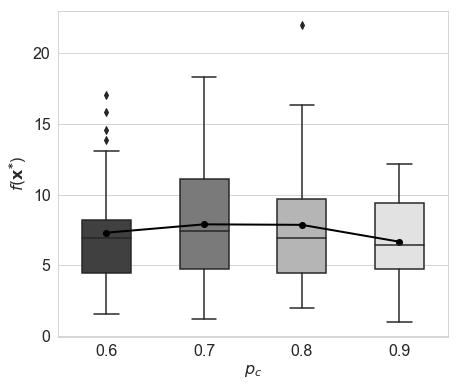

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize = (7, 6))
sns.boxplot(data = df_pcs, palette = 'Greys_r', width = 0.5)
sns.lineplot(data = df_pcs.mean().values, lw = 2, color = 'black')
sns.scatterplot(data = df_pcs.mean().values, color = 'black', s = 50, linewidth = 0)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('$f(\mathbf{x^{*}}$)', fontsize = 16)
plt.xlabel('$p_c$', fontsize = 16)
plt.savefig('pc_rastrigin.eps', dpi = 300, bbox_inches = 'tight')
plt.show()

In [5]:
fitness = list()
pm = list()

mut_probs = np.arange(start = 0.01, stop = 0.06, step = 0.01)

for mut_prob in mut_probs:
    for i in range(n_exec):
        GA = GeneticAlgorithm(n = 10, m = 20, l = 20, max_eval = 10000, mut_prob = mut_prob, cross_prob = best_cross_prob, k = 20)
        GA.solve()
        fitness.append(GA.best_fitness)
    pm.append(fitness.copy())
    fitness.clear()

Generations: 100%|██████████| 10000/10000 [00:12<00:00, 812.84it/s]


Generations: 100%|██████████| 10000/10000 [00:12<00:00, 796.25it/s]


In [6]:
best_mut_prob = mut_probs[np.argmin(np.mean(pm, axis = 1))]

In [13]:
df_pms = pd.DataFrame(data = pm)
df_pms = df_pms.transpose()
df_pms.columns = ["0.01", "0.02", "0.03", "0.04", "0.05"]
df_pms.head()

,0.01,0.02,0.03,0.04,0.05
0,2.471655,7.197827,4.966680,3.668862,6.878367
1,3.230801,7.194199,3.266380,9.710077,9.798666
2,4.231224,2.240531,7.198484,8.922081,6.131784
3,12.159008,6.707116,4.714468,6.418944,6.058760
4,8.446449,5.976335,5.002548,4.753431,11.874454


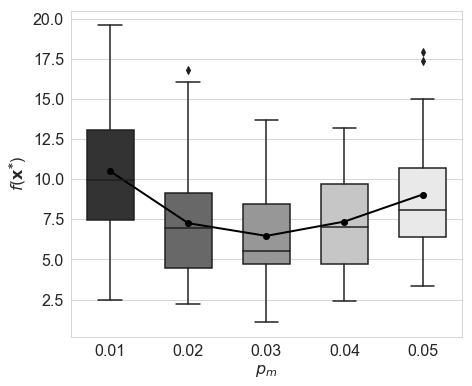

In [21]:
plt.figure(figsize = (7, 6))
sns.boxplot(data = df_pms, palette = 'Greys_r', width = 0.6)
sns.lineplot(data = df_pms.mean().values, lw = 2, color = 'black')
sns.scatterplot(data = df_pms.mean().values, color = 'black', s = 50, linewidth = 0)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('$f(\mathbf{x^{*}}$)', fontsize = 16)
plt.xlabel('$p_m$', fontsize = 16)
plt.savefig('pm_rastrigin.eps', dpi = 300, bbox_inches = 'tight')
plt.show()

In [7]:
print('Best Mutation Probability:', best_mut_prob)
print('Best Crossover Probability:', best_cross_prob)

Best Mutation Probability: 0.03
Best Crossover Probability: 0.8999999999999999


In [36]:
with open('rastrigin.npy', 'wb') as f:
    np.save(f, pm)
    np.save(f, pc)